<a href="https://colab.research.google.com/github/dsuwala/cmpp/blob/main/cmpp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from math import pi
from matplotlib.animation import FuncAnimation

In [ ]:
#spell to have animations working
from matplotlib import rc
rc('animation', html='jshtml')

# Problem 1 
Calculating Gaussian wave packet and switchind go momentum basis

In [ ]:
M = 100
x0 = 0.5
p0 = 3.

In [ ]:
n = np.arange(M)
x = 2 * pi * n/ M
hbar = 2 * pi / M

In [ ]:
def psiG(x, init : tuple, M, D=4) -> np.array:
    p0 = init[1]
    x0 = init[0]

    psiG = np.zeros(M, dtype=complex)
    psiG = np.exp(1j * (p0 * x)/hbar)

    coeff = np.zeros(M, dtype=complex)
    for d in range(-D, D, 1):
        coeff+=np.exp(-((x - x0 + 2 * pi * d)**2 ) / (2 * hbar))

    psiG*=coeff 
    psiG = psiG / np.linalg.norm(psiG)

    return psiG

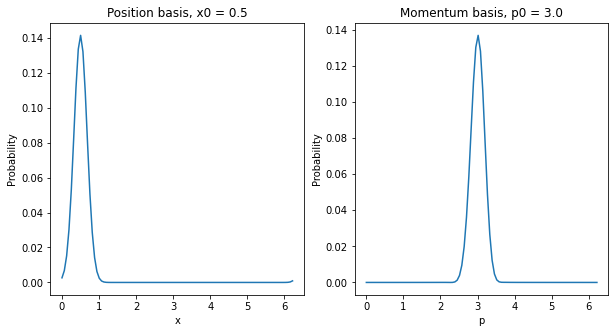

In [ ]:
# calculate gaussian wfc
y = psiG(x, (x0, p0), M)

# switch to momentum basis
p = 2 * pi * n / M 
y_p_basis = fft(y)
y_p_basis = y_p_basis / np.linalg.norm(y_p_basis)

# plotting
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)

ax1.set_title(f"Position basis, x0 = {x0}")
ax1.set_xlabel("x")
ax1.set_ylabel("Probability")
ax1.plot(x, np.abs(y)**2)



ax2 = plt.subplot(1, 2, 2)

ax2.set_title(f"Momentum basis, p0 = {p0}")
ax2.set_xlabel("p")
ax2.set_ylabel("Probability")
plt.plot(p, np.abs(y_p_basis)**2)

plt.show()

# Problem 2
Quantum evolution  \
red dot on final plot is classical particle with the same
initial conditions

In [ ]:
M = 1000
x0 = 1.1
p0 = 5.0
n = np.arange(M)
x = 2 * pi * n/ M
p = 2 * pi * n / M 
hbar = 2 * pi / M

In [ ]:
STEPS = 10

In [ ]:
def psiG(x, init : tuple, M, D=4) -> np.array:
    p0 = init[1]
    x0 = init[0]

    psiG = np.zeros(M, dtype=complex)
    psiG = np.exp(1j * (p0 * x)/hbar)

    coeff = np.zeros(M, dtype=complex)
    for d in range(-D, D, 1):
        coeff+=np.exp(-((x - x0 + 2 * pi * d)**2 ) / (2 * hbar))

    psiG*=coeff 
    psiG = psiG / np.linalg.norm(psiG)

    return psiG

In [ ]:
def evolve(psi : np.ndarray, xp : tuple, K = 1.) -> np.ndarray:
    # evolve wfc by one step

    xn = xp[0]
    pn = xp[1]
    hbar = 2 * pi / M

    V = np.exp(-1j * K * np.cos(xn) / hbar)
    P = np.exp(-( 1j * np.square(pn) ) / ( 2 * hbar ))

    psi = ifft(P * fft(V * psi))
    psi/=np.linalg.norm(psi)

    return psi

In [ ]:
psi = psiG(x, (x0, p0), M)

In [ ]:
#quantum evolution

evolution = [psi]
for step in range(STEPS):
    newpsi = evolve(psi, (x,p), K=1.2)
    evolution.append(newpsi)
    psi = newpsi


In [ ]:
# classical evolution

import math

par1 = {
    "initial_conditions" : (x0, p0),
    "K" : 1.2,
    "N" : 10
}

def kick_evolution(par : dict, p_periodic = False) -> tuple:
    x = [par["initial_conditions"][0]]
    p = [par["initial_conditions"][1]]
    
    for n in range(par["N"]):
        if not p_periodic:
            p.append(p[-1] + par["K"]*math.sin(x[-1]))
        else:
            p.append((p[-1] + par["K"]*math.sin(x[-1])) % (2 * math.pi))
            
        # here p is longer and p[-1] contains updated p
        x.append((p[-1] + x[-1]) % (2 * math.pi))
    
    return (x, p)

classical_evolution = kick_evolution(par1, p_periodic = True)

In [ ]:

fig, ax = plt.subplots(1, 1)

def animate(i):

    ax.clear()

    ax.set_title(f"Gauss evolution, step {i}")
    ax.set_xlabel("x")
    ax.set_ylabel("Probability")
    ax.grid()
    ax.set_ylim(0, 0.05)
    ax.plot(x, np.abs(evolution[i])**2, color='blue')
    ax.scatter(classical_evolution[0][i], 0.0, color='red')


anim = FuncAnimation(fig, animate, frames=10, interval=500, repeat=False)
plt.close()

anim